# Using wget

In [13]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data

--2020-08-22 01:26:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402355 (393K) [application/x-httpd-php]
Saving to: ‘arrhythmia.data’

arrhythmia.data     100%[===================>] 392.92K   753KB/s    in 0.5s    

2020-08-22 01:26:09 (753 KB/s) - ‘arrhythmia.data’ saved [402355/402355]



In [4]:
!ls

arrhythmia.data  sample_data


In [5]:
#checking whether the data has header
!head arrhythmia.data

75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,

In [14]:
import pandas as pd
df = pd.read_csv('arrhythmia.data', header=None)

In [15]:
#since the data has many columns, consider first few and name them
data = df[[0,1,2,3,4,5]]
data.columns = ['age', 'sex', 'height', 'weight', 'QRS duration', 'P_R internal']

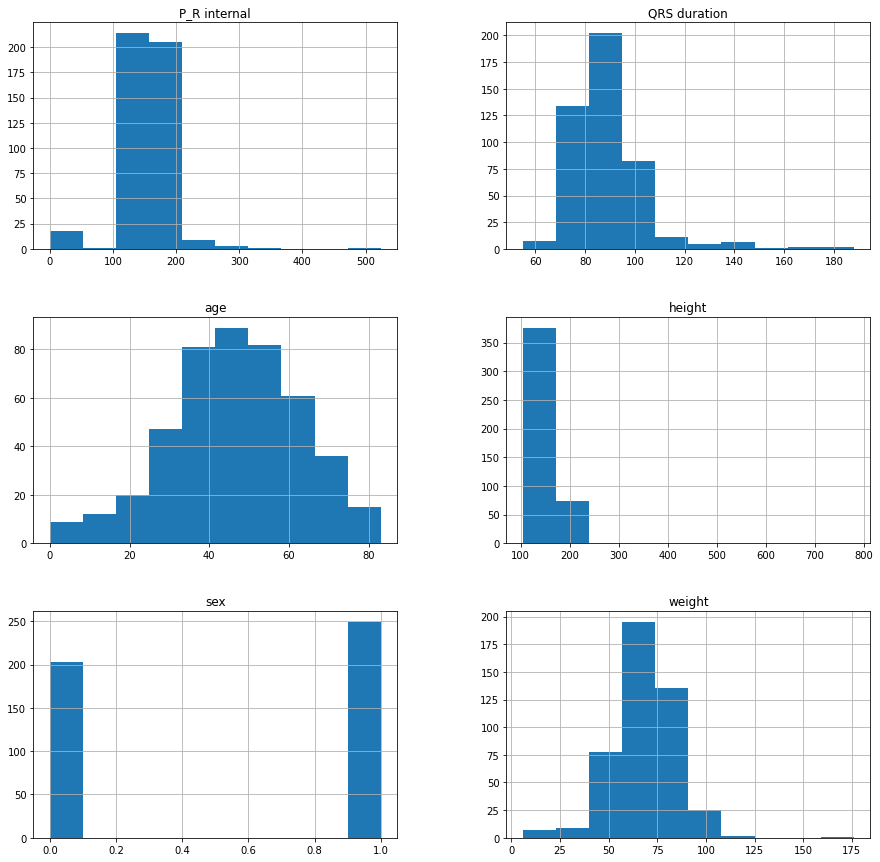

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15] #it will make the plot bigger so the subplote don't overlap
data.hist(); #use a semicolon to supress return value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dc06e2c88>,
      dtype=object)

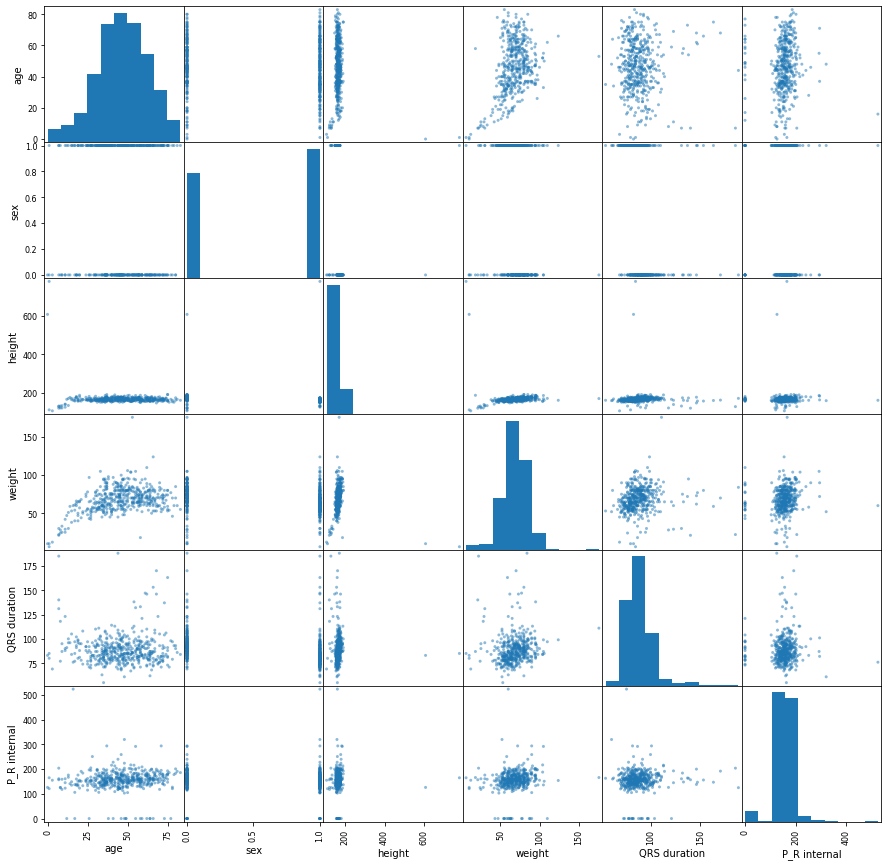

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)

# Using tf.keras

In [18]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [19]:
tf.keras.utils.get_file('auto-mpg.data', url)

32768/30286 [================================] - 0s 4us/step


'/root/.keras/datasets/auto-mpg.data'

In [20]:
!head /root/.keras/datasets/auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


In [21]:
df = pd.read_csv('/root/.keras/datasets/auto-mpg.data', header=None, delim_whitespace=True)
df.head() #head is used to return the first n rows.

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Upload the file Yourself

In [23]:
#method to upload the own file

from google.colab import files
uploaded = files.upload()

Saving supermarkets.csv to supermarkets.csv


In [24]:
uploaded

{'supermarkets.csv': b"ID,Address,City,State,Country,Name,Employees\r\n1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8\r\n2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15\r\n3,332 Hill St,San Francisco,California 94114,USA,Super River,25\r\n4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10\r\n5,1056 Sanchez St,San Francisco,California,USA,Sanchez,12\r\n6,551 Alvarado St,San Francisco,CA 94114,USA,Richvalley,20\r\n"}

In [25]:
!ls


arrhythmia.data  sample_data  supermarkets.csv


In [26]:
df=pd.read_csv('supermarkets.csv', error_bad_lines=False)
df.head()

,ID,Address,City,State,Country,Name,Employees
0,1,3666 21st St,San Francisco,CA 94114,USA,Madeira,8
1,2,735 Dolores St,San Francisco,CA 94119,USA,Bready Shop,15
2,3,332 Hill St,San Francisco,California 94114,USA,Super River,25
3,4,3995 23rd St,San Francisco,CA 94114,USA,Ben's Shop,10
4,5,1056 Sanchez St,San Francisco,California,USA,Sanchez,12


In [27]:
from google.colab import files
uploaded = files.upload()

Saving mean.py to mean.py


In [29]:
from mean import mean
mean([0, 2, 5])

function started!


2.3333333333333335

In [30]:
#to check the current working directory
!pwd

/content


# Access files from Google drive

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [32]:
!ls

arrhythmia.data  gdrive  mean.py  __pycache__  sample_data  supermarkets.csv


In [33]:
!ls gdrive

'My Drive'


In [34]:
!ls '/content/gdrive/My Drive'

'1.Webinar e-Certificate -  Panimalar 1-14.pdf'
'263 mpmc assignment.pdf'
 Classroom
 CO-LAB
'Contact Information.gform'
'Getting started.pdf'
'MONTH 2 COURSE LIST.gsheet'
'MY NOTES'
'pin diagram of 8086_2.gslides'
'selva SE RT-1.pdf'
 STACKATHON
'TECH SQUAD CERTIFICATES'
'Untitled document.gdoc'
